<a href="https://colab.research.google.com/github/apoorva666/Absenteeism-In-Employees/blob/main/ABSENTEEISM_OF_EMPLOYEES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading csv file/dataset in a varaible
raw_csv_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Absenteeism/Absenteeism_data.csv')

In [4]:
#Checking contents of the dataset
raw_csv_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Days
0,11,26,7/7/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
#Making a copy of the dataset for manipulation
df_edit=raw_csv_data.copy()

In [7]:
#Summarizing the table
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        700 non-null    int64  
 1   Reason for Absence        700 non-null    int64  
 2   Date                      700 non-null    object 
 3   Transportation Expense    700 non-null    int64  
 4   Distance to Work          700 non-null    int64  
 5   Age                       700 non-null    int64  
 6   Daily Work Load Average   700 non-null    float64
 7   Body Mass Index           700 non-null    int64  
 8   Education                 700 non-null    int64  
 9   Children                  700 non-null    int64  
 10  Pets                      700 non-null    int64  
 11  Absenteeism Time in Days  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


Object dt is a mix of numbers & names

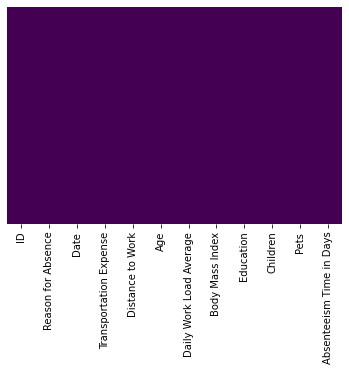

In [8]:
#Checking for missing values
sns.heatmap(df_edit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values

In [9]:
# Checking all the columns
df_edit.columns.values

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Days'], dtype=object)

In [10]:
#Dropping 'ID' as it is of no use to our prediction 
df_edit=df_edit.drop(['ID'], axis=1)

In [11]:
#Finding unique values of 'Reasons for absence'
sorting=df_edit['Reason for Absence'].unique()
print(sorted(sorting))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]


In [12]:
#Getting dummies for 'Reasons For Absence'
Reason_dummies=pd.get_dummies(df_edit['Reason for Absence'], drop_first=False)
Reason_dummies['Sum']=Reason_dummies.sum(axis=1)

Reason_dummies.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,Sum
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
#Removing column '0' to prevent multicollinearity
Reason_dummies=pd.get_dummies(df_edit['Reason for Absence'], drop_first=True)
Reason_dummies['Sum']=Reason_dummies.sum(axis=1)

Reason_dummies.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,Sum
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [15]:
#Checking values of 'Reasons for absence'
Reason_dummies.iloc[:, 0:27].columns.values

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       21, 22, 23, 24, 25, 26, 27, 28], dtype=object)

In [17]:
#List of reasons for absence
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Absence_reasons.png']))

Saving Absence_reasons.png to Absence_reasons.png


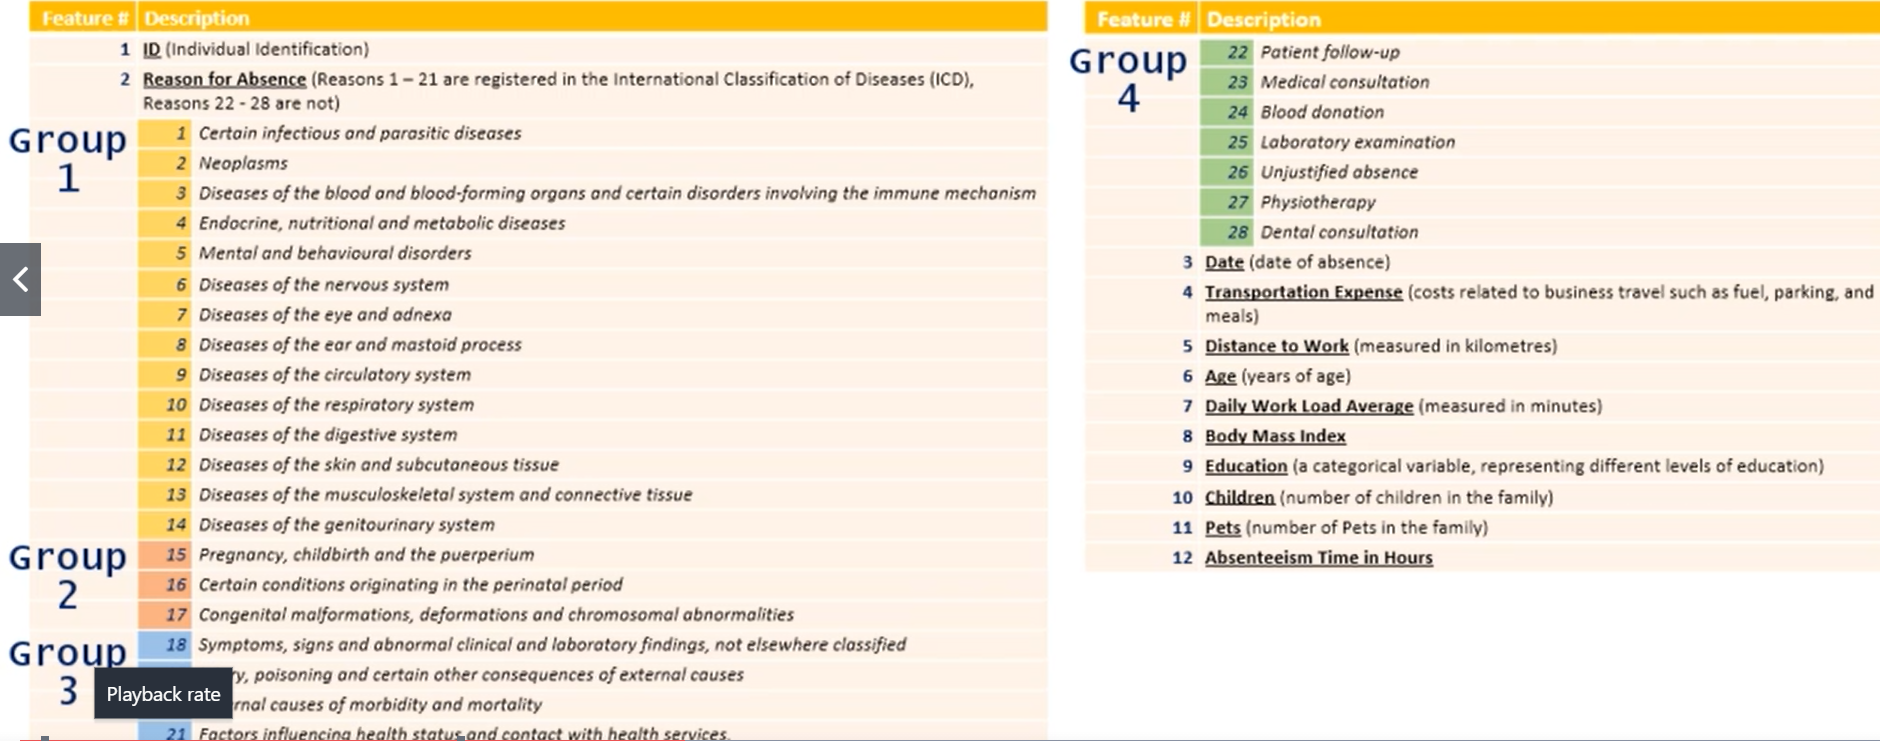

In [18]:
#Resizing the image
#Import library
from IPython.display import Image
#Load image from local storage
Image(filename = "Absence_reasons.png", width = 60000, height = 400)

In [19]:
#Grouping 'Reson for absence'
#Group1=Diseases (1-14)
#Group2=Pregnancy(15-17)
#Group3=Others (18-21)
#Group4=Health check-up(22-28)

In [20]:
#Creating dummies for 'Diseases'
Diseases=Reason_dummies.iloc[:,0:14].max(axis=1)
Diseases.head()

0    0
1    0
2    0
3    1
4    0
dtype: uint8

In [21]:
#Creating dummies for 'Health Checkup'
Health_checkup=Reason_dummies.iloc[:, 14:17].max(axis=1)

In [22]:
#Creating dummies for 'other' reasons
Others=Reason_dummies.iloc[:, 17:20].max(axis=1)

In [23]:
#Creating dummies for pregnancy
Pregnancy=Reason_dummies.iloc[:, 20:27].max(axis=1)

In [24]:
#Adding 'Reason' dummies to the data frame 
df_edit=pd.concat([df_edit, Diseases, Health_checkup, Others, Pregnancy], axis=1)

In [25]:
#Renaming the 'Reason' dummy columns
df_edit = df_edit.rename(columns={0: 'Diseases', 1: 'Health_checkup', 2:'Others', 3:'Pregnancy'})
df_edit.head(2)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Days,Diseases,Health_checkup,Others,Pregnancy
0,26,7/7/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0


In [26]:
#Dropping 'Reason for Absence'
df_edit=df_edit.drop(['Reason for Absence'], axis=1)
df_edit.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Days,Diseases,Health_checkup,Others,Pregnancy
0,7/7/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0


In [27]:
# Analyzing reasons for absence
df_edit.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Days', 'Diseases',
       'Health_checkup', 'Others', 'Pregnancy'], dtype=object)

In [28]:
#Analyzing the 'Date' column
df_edit['Date'].head()

0      7/7/2015
1    14/07/2015
2    15/07/2015
3    16/07/2015
4    23/07/2015
Name: Date, dtype: object

In [29]:
#Checking the data type of date
type(df_edit['Date'])

pandas.core.series.Series

In [30]:
#Checking the data type of first part of date
type(df_edit['Date'][0])

str

In [31]:
#Putting 'Date' in Y/M/D format in Timestamp series
df_edit['Date']=pd.to_datetime(df_edit['Date'], format='%d/%m/%Y')
df_edit['Date'].head()

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
Name: Date, dtype: datetime64[ns]

In [32]:
#Extracting Month value
list_months=[]
list_months

for i in range(700):
                    list_months.append(df_edit['Date'][i].month)        

list_months[0:20]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8]

In [33]:
df_edit['Month value']=list_months
df_edit.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Days,Diseases,Health_checkup,Others,Pregnancy,Month value
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7


In [35]:
#Month function considers no.s from 1-12 & Day of the week considers no.s from 0-6

In [36]:
#Extracting 'Day of the Week'

def date_to_weekday(date_value):
    return date_value.weekday()

df_edit['Day of the Week']=df_edit['Date'].apply(date_to_weekday)
df_edit.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Days,Diseases,Health_checkup,Others,Pregnancy,Month value,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1


In [37]:
#Checking unique values of 'Month'
month_sort=df_edit['Month value'].unique()
print(sorted(month_sort))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [38]:
#Checking unique values of 'Days of the Week'
weekdays_sort=df_edit['Day of the Week'].unique()
print(sorted(weekdays_sort))

[0, 1, 2, 3, 4, 5, 6]


In [39]:
#Dropping 'Date' column
df_edit=df_edit.drop(['Date'], axis=1)

In [40]:
#Checking Transportation expense
trans_sort=df_edit['Transportation Expense'].unique()
print(sorted(trans_sort))

[118, 155, 157, 179, 184, 189, 225, 228, 231, 233, 235, 246, 248, 260, 268, 279, 289, 291, 300, 330, 361, 369, 378, 388]


In [41]:
#Understanding distance to work (to & fro in km)
dist_sort=df_edit['Distance to Work'].unique()
print(sorted(dist_sort))

[5, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 25, 26, 27, 29, 31, 35, 36, 42, 48, 49, 50, 51, 52]


In [42]:
#Analyzing 'Age'
age_sort=df_edit['Age'].unique()
print(sorted(age_sort))

[27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 46, 47, 48, 49, 50, 58]


In [43]:
#Analyzing 'daily workload average'
workload_sort=df_edit['Daily Work Load Average'].unique()
print(sorted(workload_sort))

[205.917, 222.196, 230.29, 236.62900000000002, 237.65599999999998, 239.40900000000002, 239.554, 241.476, 244.387, 246.074, 246.28799999999998, 249.797, 251.81799999999998, 253.465, 253.957, 261.306, 261.756, 264.249, 265.017, 265.615, 268.519, 275.312, 280.54900000000004, 284.031, 284.853, 294.217, 302.585, 306.345, 308.593, 313.532, 326.452, 330.061, 343.25300000000004, 377.55, 378.884]


In [44]:
#Converting daily workload from minutes to hours
def min_to_hr(time):
      return (time/60)

df_edit['Daily Work Load Average']=df_edit['Daily Work Load Average'].map(min_to_hr)
df_edit.head(2)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Days,Diseases,Health_checkup,Others,Pregnancy,Month value,Day of the Week
0,289,36,33,3.992567,30,1,2,1,4,0,0,0,1,7,1
1,118,13,50,3.992567,31,1,1,0,0,0,0,0,0,7,1


In [45]:
#Checking the unique values of 'BMI'
BMI_sort=sorted(df_edit['Body Mass Index'].unique())
BMI_sort

[19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38]

In [46]:
#18-24=Normal, 25-30=Overweight, 30+=Obese

In [47]:
#Checking the unique values of 'Education'
edu_sort=sorted(df_edit['Education'].unique())
edu_sort

[1, 2, 3, 4]

In [48]:
#Checking the unique values of 'Pets'
pet_sort=sorted(df_edit['Pets'].unique())
pet_sort

[0, 1, 2, 4, 5, 8]

4: 'High school', 3: 'Graduate', 2: 'Post graduate', 1: 'Masters or doctor'

In [49]:
#Checking the unique values of 'Children'
child_sort=sorted(df_edit['Children'].unique())
child_sort

[0, 1, 2, 3, 4]

In [50]:
 #Classifying excessive absenteeism
 #Acceptable number of days in a month for which an employee can be absent is 3 days. 
 #Hence, any employee absent for more than 3 days would be considered excessively absent.

def excess(absenteeism): 
  if absenteeism>3:
    return 1
  else:
      return 0

df_edit['Absenteeism Time in Days'] = df_edit['Absenteeism Time in Days'].map(excess)

In [51]:
#Renaming 'Absenteeism Time in Days'
df_edit = df_edit.rename(columns={'Absenteeism Time in Days': 'Excessive Absenteeism'})
df_edit.head(1)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism,Diseases,Health_checkup,Others,Pregnancy,Month value,Day of the Week
0,289,36,33,3.992567,30,1,2,1,1,0,0,0,1,7,1


In [52]:
df_edit.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Excessive Absenteeism', 'Diseases',
       'Health_checkup', 'Others', 'Pregnancy', 'Month value',
       'Day of the Week'], dtype=object)

In [53]:
#Reordering columns
columns_reordered= ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Diseases',
       'Health_checkup', 'Others', 'Pregnancy', 'Month value',
       'Day of the Week','Excessive Absenteeism']

In [54]:
df_edit=df_edit[columns_reordered]
df_edit.head(1)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Diseases,Health_checkup,Others,Pregnancy,Month value,Day of the Week,Excessive Absenteeism
0,289,36,33,3.992567,30,1,2,1,0,0,0,1,7,1,1


**Checking if the dataset is balanced**

In [55]:
targets=df_edit['Excessive Absenteeism']

In [56]:
targets.sum() / targets.shape[0]  #Percentage of 1s, 45-55 split is acceptable

0.45571428571428574

**---------------------------------------------------------------------------**

**Checking variables for multicollinearity**

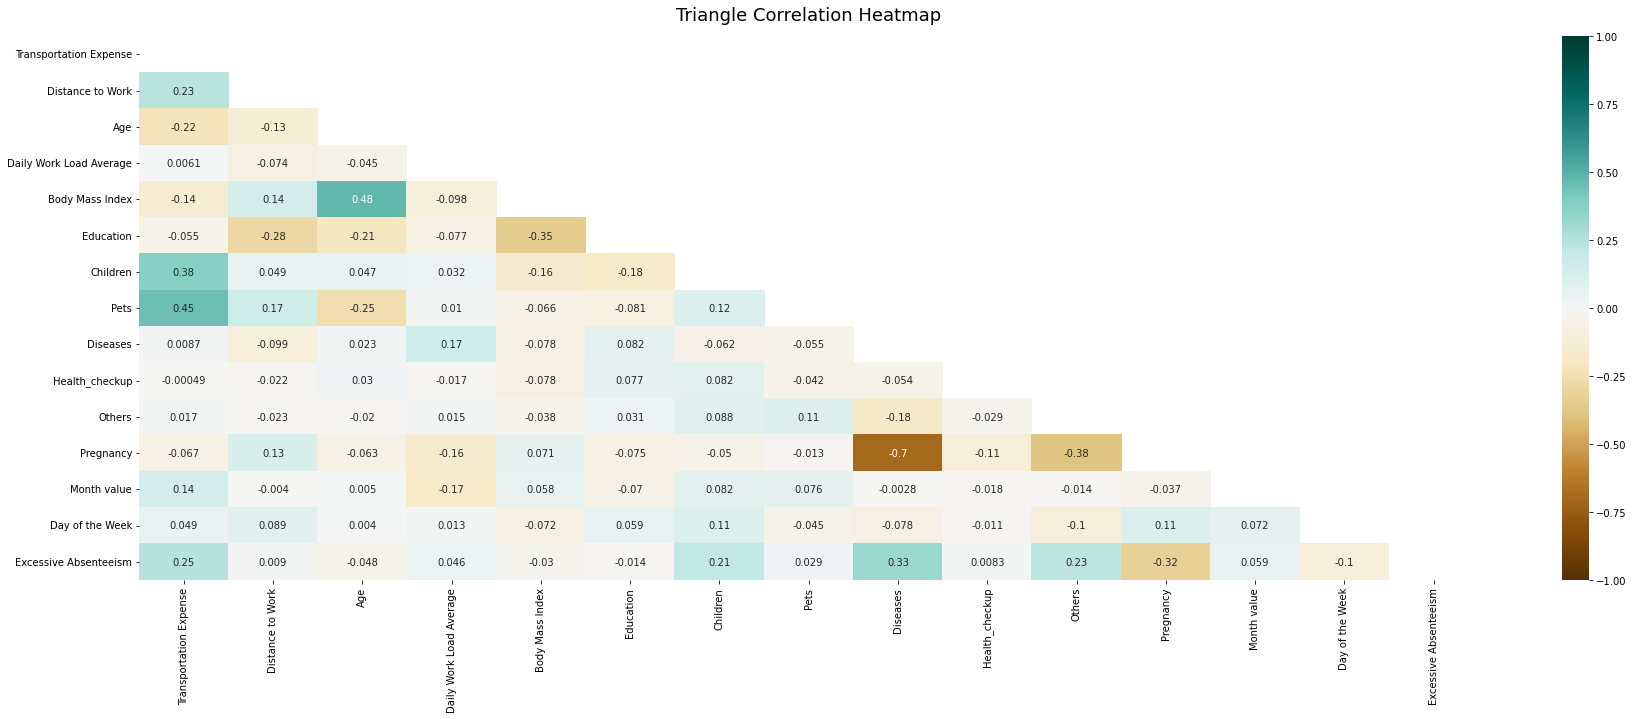

In [57]:
#Understanding the correlation between features
plt.figure(figsize=(30, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_edit.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_edit.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

There is a high negative correlation between 'Pregnancy' & 'Diseases'. This can be because pregnancy makes the body less vulnerable to major diseases like Breast Cancer, Ovarian Cancer, Multiple Sclerosis, cuts the risk of autoimmune disease in half, & keeps the heart healthy. Also, pregnant women take better care of their health & get vaccinated which helps them prevent illnesses like food poisoning, flu, & pet borne diseases. 

There is no excessively high correlation between any of the features, hence, there is no issue of multicollinearity.

In [58]:
df_edit.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Diseases', 'Health_checkup', 'Others',
       'Pregnancy', 'Month value', 'Day of the Week',
       'Excessive Absenteeism'], dtype=object)

**Making a copy of the preprocessed dataset**

In [59]:
df_preprocessed=df_edit.copy()
df_preprocessed.head(2)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Diseases,Health_checkup,Others,Pregnancy,Month value,Day of the Week,Excessive Absenteeism
0,289,36,33,3.992567,30,1,2,1,0,0,0,1,7,1,1
1,118,13,50,3.992567,31,1,1,0,0,0,0,0,7,1,0


**Selecting the inputs**

In [60]:
df_preprocessed.shape

(700, 15)

In [61]:
# Selects all rows and all columns until targets
unscaled_inputs=df_preprocessed.iloc[:,:-1]
targets=df_preprocessed['Excessive Absenteeism']     #Adding targets to the dataframe

**Data standardization**

In [62]:
from sklearn.preprocessing import StandardScaler

absenteeism_scaler = StandardScaler() #StandardScaler follows Standard Normal Distribution. Hence, it makes mean = 0 & scales the data to unit variance.

In [63]:
unscaled_inputs.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Diseases', 'Health_checkup', 'Others',
       'Pregnancy', 'Month value', 'Day of the Week'], dtype=object)

In [64]:
absenteeism_scaler.fit(unscaled_inputs) #fit() trains & learns the relationship between features

scaled_inputs=absenteeism_scaler.transform(unscaled_inputs) #transforms all the features using the respective mean and variance

In [65]:
# declaring 4 variables for the split, random state gives the same output each time the cell is run

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, 
                                                                            test_size = 0.2,random_state = 20)

In [66]:
train_test_split(scaled_inputs, targets)              #Array 1,2=train dataset with inputs & targets, Array 3,4=test dataset with inputs & targets 

[array([[ 0.85493646, -1.68264701,  0.40518428, ..., -1.21748491,
          1.32476605, -0.68370352],
        [ 1.03602595,  0.07483796,  0.56205873, ..., -1.21748491,
          1.32476605,  1.34423065],
        [ 0.04003371, -0.26313992, -1.32043461, ...,  0.82136542,
          1.32476605, -0.00772546],
        ...,
        [ 0.56821142,  1.3591539 , -0.06543905, ...,  0.82136542,
          0.18272635,  1.34423065],
        [-0.6541427 , -0.26313992, -1.00668572, ..., -1.21748491,
          0.18272635,  0.66825259],
        [-1.57468098, -1.34466913,  0.09143539, ...,  0.82136542,
         -1.53033319,  0.66825259]]),
 array([[-0.6541427 , -0.26313992, -1.00668572, ...,  0.82136542,
          0.7537462 , -1.35968157],
        [ 0.56821142,  1.3591539 , -0.06543905, ...,  0.82136542,
         -0.67380342,  1.34423065],
        [-0.6541427 ,  1.42674947,  0.24830984, ...,  0.82136542,
          0.46823627, -1.35968157],
        ...,
        [ 1.00584437,  0.41281584, -0.53606239, ...,  

**1. Logistic regression**

**Training the model**

In [67]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression() 

reg.fit(x_train,y_train)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(reg.score(x_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.79


*score() calculates the accuracy while predict() predicts the outputs*

**Checking the accuracy manually**

In [68]:
# finding the model outputs according to our model
model_outputs = reg.predict(x_train)

In [69]:
# find out in how many instances we predicted correctly
np.sum((model_outputs==y_train))

440

In [70]:
# get the total number of instances
model_outputs.shape[0]

560

In [71]:
# calculate the accuracy of the model
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.7857142857142857

**Testing the model**

In [72]:
#y_pred = reg.predict(x_test)
lr_acc=reg.score(x_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_acc))

Accuracy of logistic regression classifier on test set: 0.74


**Finding the intercepts & co-efficients**

In [73]:
# getting the intercept (bias) of our model
reg.intercept_

array([-0.22294719])

In [74]:
# getting the coefficients (weights) of our model
reg.coef_

array([[ 0.70101952, -0.04027595, -0.20272797, -0.0063544 ,  0.32452205,
        -0.13449813,  0.38128906, -0.33133716,  2.07497405,  0.32866118,
         1.55748421,  1.32926089,  0.18900507, -0.06599819]])

In [75]:
# save the names of the columns in an ad-hoc variable
feature_name = unscaled_inputs.columns.values

In [76]:
#Preparing a summary table
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# adding the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)    #Transpose to convert arrays from rows to columns

In [77]:
# adding the intercept at index 0
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# sorting the df by index
summary_table = summary_table.sort_index()

In [78]:
#Finding the odds ratio of coefficients
#Odds are the probability of an event occurring divided by the probability of the event not occurring. 
#An odds ratio is the odds of the event in one group, for example, those exposed to a drug, divided by the odds in another group not exposed.
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=True)

,Feature name,Coefficient,Odds_ratio
7,Pets,-0.331337,0.717963
0,Intercept,-0.222947,0.800157
2,Age,-0.202728,0.816500
5,Education,-0.134498,0.874155
13,Day of the Week,-0.065998,0.936133
1,Distance to Work,-0.040276,0.960524
3,Daily Work Load Average,-0.006354,0.993666
12,Month value,0.189005,1.208047
4,Body Mass Index,0.324522,1.383369
9,Health_checkup,0.328661,1.389107


**Odds ratio interpretation: It is 7 times more likely that a person stating reason as 'Disease' is going to be more excessively absent as compared to someone with other reasons.**

In [79]:
#A feature is not important if: it's coefficient is close to 0 or if it's odds ratio is around 1.

**2. Naive Bayes**

In [80]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

print('Accuracy of Naive Bayes classifier on train set: {:.2f}'.format(gnb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on train set: 0.74


In [81]:
nb_acc = gnb.score(x_test, y_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(nb_acc))

#or
#from sklearn import metrics
#y_predn = gnb.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_predn))

Accuracy of Naive Bayes classifier on test set: 0.72


**3. SVM**

In [82]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(x_train, y_train)

print('Accuracy of SVM classifier on train set: {:.2f}'.format(svm_clf.score(x_train, y_train)))

Accuracy of SVM classifier on train set: 0.81


In [83]:
svm_acc=svm_clf.score(x_test, y_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_acc))

Accuracy of SVM classifier on test set: 0.76


**4. Decision Tree**

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=7, min_samples_leaf=2)   
tree_model.fit(scaled_inputs,targets)

print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(tree_model.score(x_train, y_train)))

Accuracy of Decision Tree classifier on train set: 0.86


In [85]:
pred_dt=tree_model.score(x_test, y_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(pred_dt))

Accuracy of Decision Tree classifier on test set: 0.82


**Tree Pruning**

***Post Pruning***

[Text(512.8048469387755, 509.625, 'X[8] <= 0.577\ngini = 0.496\nsamples = 700\nvalue = [381, 319]'),
 Text(320.99234693877554, 441.675, 'X[10] <= 1.433\ngini = 0.462\nsamples = 525\nvalue = [335, 190]'),
 Text(203.5561224489796, 373.725, 'X[0] <= 0.478\ngini = 0.419\nsamples = 462\nvalue = [324, 138]'),
 Text(136.65306122448982, 305.775, 'X[4] <= 2.296\ngini = 0.326\nsamples = 331\nvalue = [263, 68]'),
 Text(91.10204081632654, 237.825, 'X[1] <= -1.176\ngini = 0.308\nsamples = 316\nvalue = [256, 60]'),
 Text(45.55102040816327, 169.875, 'X[3] <= -0.525\ngini = 0.448\nsamples = 59\nvalue = [39, 20]'),
 Text(22.775510204081634, 101.92500000000001, 'X[12] <= 0.611\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(11.387755102040817, 33.97500000000002, 'gini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(34.163265306122454, 33.97500000000002, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(68.32653061224491, 101.92500000000001, 'X[0] <= -1.296\ngini = 0.301\nsamples = 38\nvalue = [3

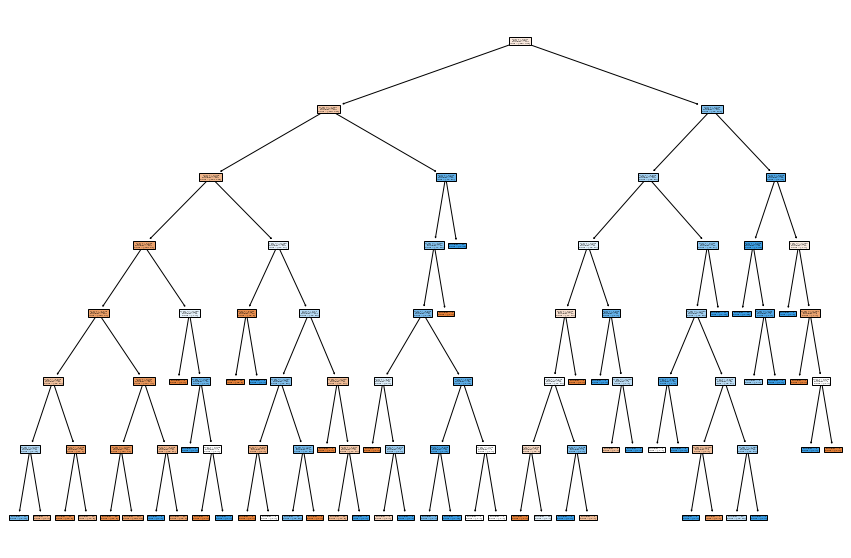

In [86]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)

In [87]:
path = tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.        , 0.00034787, 0.00055724, 0.00089286,
       0.00101328, 0.00118495, 0.00127551, 0.00133712, 0.00133929,
       0.00135281, 0.00158163, 0.00214286, 0.0021875 , 0.00244912,
       0.00262605, 0.00267857, 0.00267857, 0.00272109, 0.00283018,
       0.0030525 , 0.00306153, 0.00315807, 0.0031746 , 0.00321429,
       0.00322066, 0.00322176, 0.00335165, 0.00390306, 0.00393634,
       0.00414886, 0.00424459, 0.00424683, 0.00438828, 0.00443878,
       0.00463822, 0.00492711, 0.00518094, 0.00530609, 0.00597612,
       0.00736373, 0.00860021, 0.01047664, 0.01267465, 0.02497439,
       0.03607828, 0.05693145])

In [88]:
clfs = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_model.fit(x_train, y_train)
    clfs.append(tree_model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0569314495285545


***Accuracy vs alpha for training and testing sets***

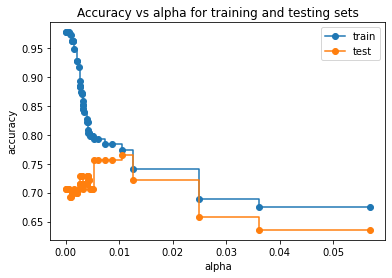

In [89]:
train_scores = [tree_model.score(x_train, y_train) for tree_model in clfs]
test_scores = [tree_model.score(x_test, y_test) for tree_model in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [90]:
tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [91]:
pred=tree_model.predict(x_test)
from sklearn.metrics import accuracy_score
post_pru_acc=accuracy_score(y_test, pred)
post_pru_acc

0.7642857142857142

[Text(418.5, 475.65000000000003, 'X[11] <= -0.198\ngini = 0.495\nsamples = 560\nvalue = [307, 253]'),
 Text(251.10000000000002, 339.75, 'X[8] <= 0.577\ngini = 0.449\nsamples = 223\nvalue = [76, 147]'),
 Text(167.4, 203.85000000000002, 'X[10] <= 1.433\ngini = 0.499\nsamples = 84\nvalue = [40, 44]'),
 Text(83.7, 67.94999999999999, 'gini = 0.157\nsamples = 35\nvalue = [32, 3]'),
 Text(251.10000000000002, 67.94999999999999, 'gini = 0.273\nsamples = 49\nvalue = [8, 41]'),
 Text(334.8, 203.85000000000002, 'gini = 0.384\nsamples = 139\nvalue = [36, 103]'),
 Text(585.9, 339.75, 'X[0] <= 0.138\ngini = 0.431\nsamples = 337\nvalue = [231, 106]'),
 Text(502.20000000000005, 203.85000000000002, 'gini = 0.29\nsamples = 205\nvalue = [169, 36]'),
 Text(669.6, 203.85000000000002, 'X[2] <= 0.327\ngini = 0.498\nsamples = 132\nvalue = [62, 70]'),
 Text(585.9, 67.94999999999999, 'gini = 0.441\nsamples = 76\nvalue = [25, 51]'),
 Text(753.3000000000001, 67.94999999999999, 'gini = 0.448\nsamples = 56\nvalue = 

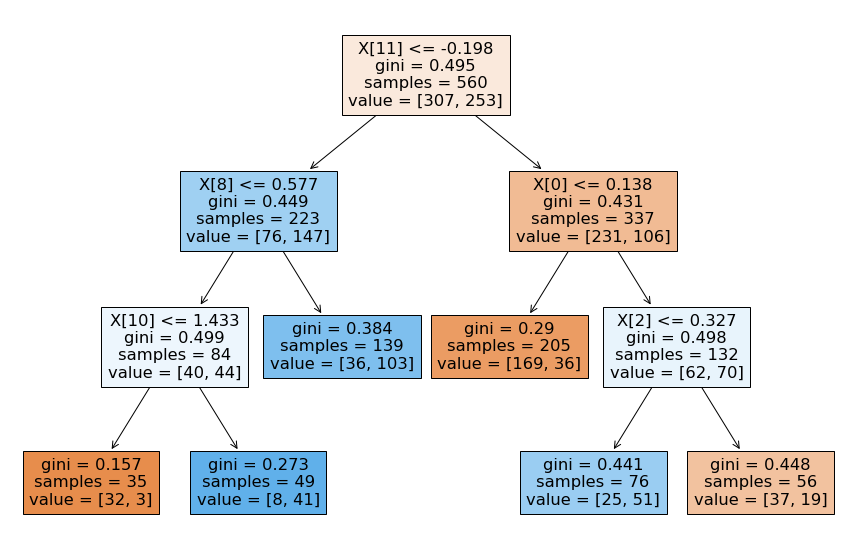

In [92]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)

***Pre Pruning***

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_inputs, targets, random_state=0)

In [94]:
clf_pre= DecisionTreeClassifier()
path = clf_pre.cost_complexity_pruning_path(X_train, Y_train)
path

{'ccp_alphas': array([0.        , 0.00031746, 0.00057143, 0.00059524, 0.00063492,
        0.00077922, 0.00095238, 0.00101587, 0.00103175, 0.00108844,
        0.00114286, 0.00114286, 0.00119728, 0.001221  , 0.00122751,
        0.00123887, 0.00126984, 0.00126984, 0.00141093, 0.00142857,
        0.00142857, 0.00142857, 0.00145125, 0.00148148, 0.00151172,
        0.00156288, 0.0015873 , 0.0015873 , 0.00163265, 0.001678  ,
        0.00169312, 0.0017402 , 0.0018479 , 0.00190476, 0.00217687,
        0.00236735, 0.00238095, 0.00244898, 0.00253968, 0.00253968,
        0.00253968, 0.00258966, 0.00259788, 0.00290249, 0.0031746 ,
        0.003256  , 0.00328042, 0.00333333, 0.00335331, 0.00337761,
        0.00342857, 0.00353963, 0.00355556, 0.00365486, 0.00391908,
        0.00408163, 0.00449328, 0.00457143, 0.00472089, 0.0047619 ,
        0.00527196, 0.00550215, 0.00556013, 0.0058194 , 0.00629688,
        0.0066862 , 0.00974594, 0.00977818, 0.0207212 , 0.0408131 ,
        0.05748034]),
 'impurities

In [95]:
#from sklearn.model_selection import GridSearchCV

#grid_param={"criterion":["gini","entropy"],
 #            "splitter":["best","random"],
  #           "max_depth":range(2,50,1),
   #          "min_samples_leaf":range(1,15,1),
    #         "min_samples_split":range(2,20,1) 
     #       }
#grid_search_prepru=GridSearchCV(estimator=tree_model,param_grid=grid_param,cv=5,n_jobs=-1)
#grid_search_prepru.fit(X_train,y_train)

In [96]:
#print(grid_search_prepru.best_params_)

In [97]:
prepru_predicted=tree_model.predict(X_test)
pre_pru_acc=accuracy_score(Y_test,prepru_predicted)
pre_pru_acc

0.8

**5. Random Forest**

In [98]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model.fit(x_train,y_train)

print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rf_model.score(x_train, y_train)))

Accuracy of Random Forest classifier on train set: 0.98


In [99]:
#y_predrf = rf_model.predict(x_testrf)
rand_acc=rf_model.score(x_test, y_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rand_acc))

Accuracy of Random Forest classifier on test set: 0.75


**6. KNN**

In [100]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47809144373375745
RMSE value for k=  2 is: 0.46866070578069285
RMSE value for k=  3 is: 0.4772607021092118
RMSE value for k=  4 is: 0.45806269065645216
RMSE value for k=  5 is: 0.44304143630784054
RMSE value for k=  6 is: 0.4357533159724116
RMSE value for k=  7 is: 0.42908132932115756
RMSE value for k=  8 is: 0.4282178601066118
RMSE value for k=  9 is: 0.42621338355865246
RMSE value for k=  10 is: 0.4351518618334786
RMSE value for k=  11 is: 0.4354427512433633
RMSE value for k=  12 is: 0.4374574809270584
RMSE value for k=  13 is: 0.44346480274810524
RMSE value for k=  14 is: 0.44619381582760514
RMSE value for k=  15 is: 0.4479583313955291
RMSE value for k=  16 is: 0.44802393510678806
RMSE value for k=  17 is: 0.44804182065942477
RMSE value for k=  18 is: 0.4471889468050623
RMSE value for k=  19 is: 0.44432845956145595
RMSE value for k=  20 is: 0.4439876124398067


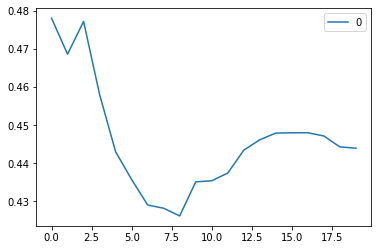

In [102]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Number of clusters we require is '6'.


In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(x_train, y_train)
 
# Calculate the accuracy of the model
print('Accuracy of KNN classifier on train set: {:.2f}'.format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on train set: 0.80


In [104]:
knn_acc=knn.score(x_test, y_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn_acc))

Accuracy of KNN classifier on test set: 0.73


**Boosting**

***Ada Boost***

In [105]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ada_model.fit(x_train,y_train)
print('Accuracy of Ada Boost classifier on train set: {:.2f}'.format(ada_model.score(x_train, y_train)))

Accuracy of Ada Boost classifier on train set: 0.79


In [106]:
ada_acc=ada_model.score(x_test, y_test)
print('Accuracy of Ada Boost classifier on test set: {:.2f}'.format(ada_acc))

Accuracy of Ada Boost classifier on test set: 0.73


***XG Boost***

In [107]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)
print('Accuracy of XG Boost classifier on train set: {:.2f}'.format(xg_model.score(x_train, y_train)))

Accuracy of XG Boost classifier on train set: 0.85


In [108]:
xg_acc=xg_model.score(x_test, y_test)
print('Accuracy of XG Boost classifier on test set: {:.2f}'.format(xg_acc))

Accuracy of XG Boost classifier on test set: 0.74


**Model Comparison**

In [109]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines','Decision Tree', 'Post Pruning', 'Pre Pruning', 'Random Forest', 
              'K - Nearest Neighbors', 'XG Boost', 'Ada Boost'],
    
    'Score': [lr_acc, nb_acc, svm_acc, pred_dt, post_pru_acc, pre_pru_acc, rand_acc, knn_acc, xg_acc, ada_acc]})
  
models.sort_values(by='Score', ascending=True)

,Model,Score
1,Naive Bayes,0.721429
7,K - Nearest Neighbors,0.728571
9,Ada Boost,0.728571
0,Logistic Regression,0.735714
8,XG Boost,0.742857
6,Random Forest,0.750000
2,Support Vector Machines,0.757143
4,Post Pruning,0.764286
5,Pre Pruning,0.800000
3,Decision Tree,0.821429


***Decision tree has given the best test accuracy of all the models***

**---------------------------------------------------------------------------**

**Stratified k-Fold Cross Validation**

In [110]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import model_selection

In [111]:
#10-fold cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
kfold = model_selection.StratifiedShuffleSplit(n_splits=10, random_state = 0)
result1 = model_selection.cross_val_score(reg, x_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(gnb, x_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(svm_clf, x_train, y_train, cv=kfold)
result4 = model_selection.cross_val_score(tree_model, x_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(rf_model, x_train, y_train, cv=kfold)
result6 = model_selection.cross_val_score(knn, x_train, y_train, cv=kfold)
result7 = model_selection.cross_val_score(ada_model, x_train, y_train, cv=kfold)
result8 = model_selection.cross_val_score(xg_model, x_train, y_train, cv=kfold)

In [112]:
#Printing the accuracies achieved in cross-validation
print('Accuracy of Logistic Regression Model = ',result1.mean())
print('Accuracy of Naive Bayes Model = ',result2.mean())
print('Accuracy of Support Vector Machine = ',result3.mean())
print('Accuracy of Decision Tree = ',result4.mean())
print('Accuracy of Random Forest Model = ',result5.mean())
print('Accuracy of KNN Model = ',result6.mean())
print('Accuracy of Ada Boost Model = ',result7.mean())
print('Accuracy of XG Boost Model = ',result8.mean())

Accuracy of Logistic Regression Model =  0.7660714285714286
Accuracy of Naive Bayes Model =  0.7339285714285715
Accuracy of Support Vector Machine =  0.7696428571428571
Accuracy of Decision Tree =  0.7232142857142858
Accuracy of Random Forest Model =  0.7214285714285714
Accuracy of KNN Model =  0.7107142857142857
Accuracy of Ada Boost Model =  0.7553571428571428
Accuracy of XG Boost Model =  0.75


***Stratified K Fold Cross Validation on diffeferent models has given accuracies between 71 & 77. Comparatively, logistic regression & Support Vector Machine have performed the best.***

**---------------------------------------------------------------------------**

**Grid Search**

**Logistic regression grid search**

In [113]:
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import GridSearchCV
scaled_inputs, targets = make_classification(n_samples=1000, n_classes=2, random_state=43)  
#n_samples=no.of test records considered in each fold 
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.25, random_state=43)

In [114]:
parameter_grid = {'C':[0.001,0.01,0.1,1,10],   #
                  'penalty':['l1', 'l2']  
                  }

In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=43)
estimator = GridSearchCV(estimator=lr, param_grid=parameter_grid, \
scoring='accuracy', cv=10, n_jobs=-1)
lr = LogisticRegression(random_state=43)
estimator = GridSearchCV(estimator=lr, param_grid=parameter_grid, \
scoring='accuracy', cv=10, n_jobs=-1)

In [116]:
estimator.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=43), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [117]:
print(estimator.best_params_)
print(estimator.best_estimator_)
print(estimator.best_score_)
print(estimator.best_params_)
print(estimator.best_estimator_)
print(estimator.best_score_)

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, random_state=43)
0.9279999999999999
{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, random_state=43)
0.9279999999999999


In [118]:
best_penalty = estimator.best_params_['penalty']
best_C = estimator.best_params_['C']

clf_lr = LogisticRegression(penalty=best_penalty, C=best_C)
clf_lr.fit(x_train, y_train)

predictions = clf_lr.predict(x_test)

import sklearn.metrics as metrics
acc_lr = round( metrics.accuracy_score(y_test, predictions) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_lr )

Accuracy of Decision Tree model :  93.2


In [119]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [120]:
# Instantiate GridSearchCV with the required parameters
grid_modelLR = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_modelLR.fit(scaled_inputs, targets)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" % (best_score, best_params))

Best: 0.936000 using {'max_iter': 100, 'tol': 0.01}


**Naive Bayes Grid Search**

In [121]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.08111308307896872)


In [123]:
y_prednbg = nbModel_grid.predict(x_test)

In [124]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
print(confusion_matrix(y_test, y_prednbg), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred), ": is the accuracy score")
acc_nbg = round( metrics.accuracy_score(y_test, y_prednbg) * 100, 2 )
print( 'Accuracy of Naive Bayes model : ', acc_nbg )

[[115   6]
 [  8 121]] : is the confusion matrix
Accuracy of Naive Bayes model :  94.4


**SVM Grid Search**

In [125]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [126]:
# Prediction on test data
y_predsv = svc.predict(x_test)
# Calculating the accuracy
import sklearn.metrics as metrics
acc_svm = round( metrics.accuracy_score(y_test, y_predsv) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  94.8


**KNN Grid Search**

In [127]:
# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10)

In [128]:
# Prediction on test data
y_predknn = knn.predict(x_test)

# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_predknn) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  91.2


**Decision Tree Grid Search**

In [129]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier(criterion="gini", random_state=0,max_depth=7, min_samples_leaf=2)

In [130]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       random_state=0)

In [131]:
# Prediction on test set
y_pred = clf.predict(x_test)
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  94.4


**Random Forest Grid Search**

In [132]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=5, n_estimators=10, random_state=42)

In [133]:
# Prediction on test data
y_pred = rf.predict(x_test)
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  94.8


**XGBoost Grid Search**

In [134]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [135]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [136]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [137]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [138]:
optimal_model_fit=grid_search.fit(scaled_inputs, targets)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [139]:
optimal_model_xg=grid_search.best_estimator_

In [140]:
from sklearn.model_selection import RepeatedStratifiedKFold
tuned_model = XGBClassifier(random_state=1, 
                            colsample_bytree=0.3, 
                            gamma=1, 
                            learning_rate=0.01, 
                            max_depth=5, 
                            min_child_weight=1,
                            n_estimators=100,
                            scale_pos_weight=2, 
                            subsample=0.9)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(tuned_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [141]:
# Prediction on test data
y_predxg = optimal_model_fit.predict(x_test)
# Calculating the accuracy
acc_xbg = round( metrics.accuracy_score(y_test, y_predxg) * 100 , 2 )
print( 'Accuracy of XG Boost model : ', acc_xbg )

Accuracy of XG Boost model :  95.2


**Ada Boost Grid Search**

In [142]:
from sklearn.model_selection import GridSearchCV
params = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
ada_grid_cv = GridSearchCV(AdaBoostClassifier(), param_grid= params, cv=5, n_jobs=-1)
ada_grid_cv.fit(scaled_inputs,targets)
ada_grid_cv.best_params_

{'learning_rate': 0.05, 'n_estimators': 70}

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(scaled_inputs, targets)
# summarize the best score and configuration
ada_acc=(grid_result.best_score_)*100
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.954000 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}


**Model Comparison of Grid Search**

In [145]:
grid_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines','Decision Tree', 'Random Forest', 
              'K - Nearest Neighbors', 'XG Boost', 'Ada Boost'],
    
    'Score': [acc_lr, acc_nbg, acc_svm, acc_dt, acc_rf, acc_knn, acc_xbg, ada_acc]})
  
grid_models.sort_values(by='Score', ascending=True)

,Model,Score
5,K - Nearest Neighbors,91.2
0,Logistic Regression,93.2
1,Naive Bayes,94.4
3,Decision Tree,94.4
2,Support Vector Machines,94.8
4,Random Forest,94.8
6,XG Boost,95.2
7,Ada Boost,95.4


***Grid Search on different ML algorithms has given an accuracy between 91 & 95. Comparitively, the boosting algorithms have performed the best***

**Saving Ada Boost model**

In [146]:
#Pickling is done to convert an object (here, "reg") into byte stream for easily transportation across various online sources 
import pickle

In [147]:
#Pickling Logistic regression object
with open('ada_grid_cv', 'wb') as file:      #model=our ML model, wb=write bytes
    pickle.dump(reg, file)             #dump=save, reg=object

In [148]:
# pickle the scaler file
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)